<a href="https://colab.research.google.com/github/worldstar0722/IS_4482_25FA/blob/main/A8_Choi_Ellie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

url = "https://raw.githubusercontent.com/matthewpecsok/4482_fall_2024/main/data/CD_additional_modified.csv"
df = pd.read_csv(url)

# **Task 1**

In [12]:
print("info")
df.info()
print("describe")
display(df.describe(include='all'))
print("head")
display(df.head())

# Identify or set the target column
possible_targets = [c for c in df.columns if c.lower() in ('target','y','class','response','label','outcome','churn')]
target_col = possible_targets[0] if possible_targets else df.columns[-1]
print("Selected target column:", target_col)

# Separate target variable
y_target = df.pop(target_col)
print(f"Popped target column '{target_col}' into y_target")

# Encode the target variable
y_target_encoded = pd.get_dummies(y_target, drop_first=True)
print("Encoded target (first rows):")
display(y_target_encoded.head())

# Encode the features
df_encoded = pd.get_dummies(df, drop_first=True)
print("Encoded features shape:", df_encoded.shape)
display(df_encoded.head())

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4117 non-null   int64  
 11  campaign        4117 non-null   int64  
 12  pdays           4117 non-null   int64  
 13  previous        4117 non-null   int64  
 14  poutcome        4117 non-null   object 
 15  emp_var_rate    4117 non-null   float64
 16  cons_price_idx  4117 non-null   float64
 17  cons_conf_idx   4117 non-nul

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,4117.000000,4117,4117,4117,4117,4117,4117,4117,4117,4117,...,4117.000000,4117.000000,4117.000000,4117,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117
unique,NaN,12,4,7,2,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1012,2508,1264,3314,2175,3347,2650,1378,860,...,NaN,NaN,NaN,3522,NaN,NaN,NaN,NaN,NaN,3666
mean,40.115375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537042,960.403449,0.190187,NaN,0.085742,93.580131,-40.500947,3.621904,5166.496502,NaN
std,10.314847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568668,191.967524,0.541765,NaN,1.562799,0.579061,4.593445,1.733448,73.670942,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


head


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Selected target column: y
Popped target column 'y' into y_target
Encoded target (first rows):


,yes
0,False
1,False
2,False
3,False
4,False


Encoded features shape: (4117, 51)


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,True,False,False,False,False,False,False,False,True,False
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,True,False,False,False,False,False,False,False,True,False
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,False,False,False,False,False,False,False,True,True,False
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,False,False,False,False,False,False,False,True,False
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,False,True,False,False,True,False,False,False,True,False


# **Task 2**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_encoded.copy()

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Standardized features (first rows):")
display(X_scaled_df.head())


Standardized features (first rows):


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,-0.980781,0.903544,-0.209099,0.201082,-0.351094,-1.206791,-1.186776,-1.240843,-1.332133,-0.914943,...,1.409845,-0.348120,-0.130558,-0.125661,-0.511966,-0.513855,-0.506292,-0.488816,0.411021,-0.189006
1,-0.108146,0.349992,0.569609,0.201082,-0.351094,0.649080,0.714811,0.892891,0.711441,0.332648,...,1.409845,-0.348120,-0.130558,-0.125661,-0.511966,-0.513855,-0.506292,-0.488816,0.411021,-0.189006
2,-1.465578,-0.117190,-0.598453,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.773175,0.836300,...,-0.709298,-0.348120,-0.130558,-0.125661,-0.511966,-0.513855,-0.506292,2.045761,0.411021,-0.189006
3,-0.205106,-0.941629,0.180255,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.771444,0.836300,...,-0.709298,-0.348120,-0.130558,-0.125661,-0.511966,-0.513855,-0.506292,-0.488816,0.411021,-0.189006
4,0.667529,-0.780667,-0.598453,0.201082,-0.351094,-0.118867,-0.656542,-0.326386,0.328343,0.397810,...,-0.709298,2.872575,-0.130558,-0.125661,1.953255,-0.513855,-0.506292,-0.488816,0.411021,-0.189006


# Explanation
- Used `StandardScaler` to normalize the feature values (mean = 0, std = 1).
- Stored the standardized data in `X_scaled_df` for later modeling.</br>

# **Task 3**

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Prepare target
if isinstance(y_target_encoded, pd.DataFrame):
    if y_target_encoded.shape[1] == 1:
        y = y_target_encoded.iloc[:, 0]
    else:
        y = y_target_encoded.iloc[:, 0]
        print("⚠️ Multiple target columns found; using the first one.")
else:
    y = y_target_encoded

# Define model and grid
param_grid = {
    'n_neighbors': list(range(1, 11)),
    'p': [1, 2]  # 1=Manhattan, 2=Euclidean
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, scoring='f1', cv=3, return_train_score=True, n_jobs=-1)

print("Running GridSearchCV...")
grid.fit(X_scaled_df, y)
print("GridSearch completed!")
print("Best params:", grid.best_params_)
print("Best f1 score:", grid.best_score_)

# Convert results to DataFrame
results_df = pd.DataFrame(grid.cv_results_)
results_df_sorted = results_df.sort_values('mean_test_score', ascending=False).reset_index(drop=True)
display_cols = ['param_n_neighbors', 'param_p', 'mean_test_score', 'std_test_score', 'rank_test_score']
display(results_df_sorted[display_cols].head(10))


Running GridSearchCV...
GridSearch completed!
Best params: {'n_neighbors': 3, 'p': 2}
Best f1 score: 0.3496793281840715


,param_n_neighbors,param_p,mean_test_score,std_test_score,rank_test_score
0,3,2,0.349679,0.006442,1
1,1,2,0.347827,0.052664,2
2,5,2,0.335399,0.015683,3
3,7,2,0.329806,0.034547,4
4,3,1,0.324773,0.020403,5
5,1,1,0.322217,0.044222,6
6,9,2,0.321435,0.020887,7
7,7,1,0.301728,0.029279,8
8,5,1,0.298768,0.022841,9
9,8,2,0.286691,0.033605,10


# Explanation
- Used `GridSearchCV` with `KNeighborsClassifier` to find the best number of neighbors (`1–10`) and distance metric (`p=1` or `p=2`).
- Evaluated using 3-fold cross-validation with F1 score.
- Displayed the top parameter combinations with highest F1 scores.</br>

# **Task 4**

Pivot table of mean_test_score:


param_p,1,2
param_n_neighbors,,
1,0.322217,0.347827
2,0.203213,0.196563
3,0.324773,0.349679
4,0.247707,0.266307
5,0.298768,0.335399
6,0.248558,0.276975
7,0.301728,0.329806
8,0.235653,0.286691
9,0.282345,0.321435


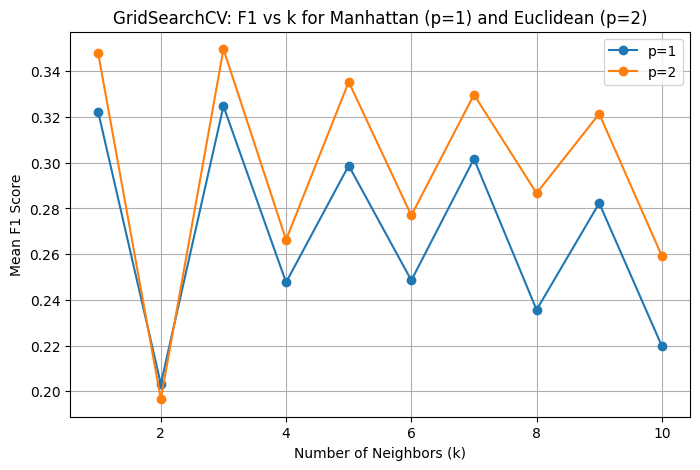

Top 5 models with best mean_test_score:


,param_n_neighbors,param_p,mean_test_score
0,3,2,0.349679
1,1,2,0.347827
2,5,2,0.335399
3,7,2,0.329806
4,3,1,0.324773


In [15]:
import matplotlib.pyplot as plt

pivot = results_df.pivot_table(index='param_n_neighbors', columns='param_p', values='mean_test_score')
print("Pivot table of mean_test_score:")
display(pivot)

# Plot F1 score vs neighbors
fig, ax = plt.subplots(figsize=(8, 5))
for col in pivot.columns:
    ax.plot(pivot.index, pivot[col], marker='o', label=f"p={col}")

ax.set_xlabel("Number of Neighbors (k)")
ax.set_ylabel("Mean F1 Score")
ax.set_title("GridSearchCV: F1 vs k for Manhattan (p=1) and Euclidean (p=2)")
ax.legend()
plt.grid(True)
plt.show()

# Top 5 results
top5 = results_df_sorted[['param_n_neighbors', 'param_p', 'mean_test_score']].head(5)
print("Top 5 models with best mean_test_score:")
display(top5)

# Explanation
-Plotted F1 scores for each neighbor count (`k`) and distance metric (`p`).
- Displayed the top 5 parameter combinations with the best F1 scores.
- Identified which distance metric (Manhattan or Euclidean) and `k` value produced the best results.</br>